# Chapter 18 Argument

The place where a name is defined in our code determines much of its meaning. Arguments (a.k.a. parameters) are assigned to names in a function, but they have more to do with object references than with variable scopes. 

## Argument-Passing Basics
arguments are passed by assignment.
- Arguments are passed by automatically assigning objects to local variable names -> Because **references are implemented as pointers, all arguments are, in effect, passed by pointer**. *Objects passed as arguments are never automatically copied*.
- Assigning  to  argument  names  inside  a  function  does  not  affect  the  caller -> **Argument names in the function header become new, local names when the function runs, in the scope of the function**.
- Changing  a  mutable  object  argument  in  a  function  may  impact  the  caller -> as arguments are simply assigned to passed-in objects, **functions can change passed-in mutable objects in place, and the results may affect the caller**. Mutable arguments can be input and output for functions.
- Immutable arguments are effectively passed “by value.” Objects such as integers and strings are passed by object reference instead of by copying, but because you can’t change immutable objects in place anyhow, the effect is much like making a copy.
-  Mutable arguments are effectively passed “by pointer.” Objects such as lists and dictionaries are also passed by object reference

### Arguments and Shared References 
##### lack of name aliasing
assignment to an argument name inside a function  does not magically change a variable in the scope of the function call. Argument names may share passed objects initially (they are essen- tially pointers to those objects), but only temporarily, when the function is first called. As soon as an argument name is reassigned, this relationship ends. 

When arguments are passed mutable objects like lists and dictionaries, we also need to be aware that in- place changes to such objects may live on after a function exits, and hence impact callers. 

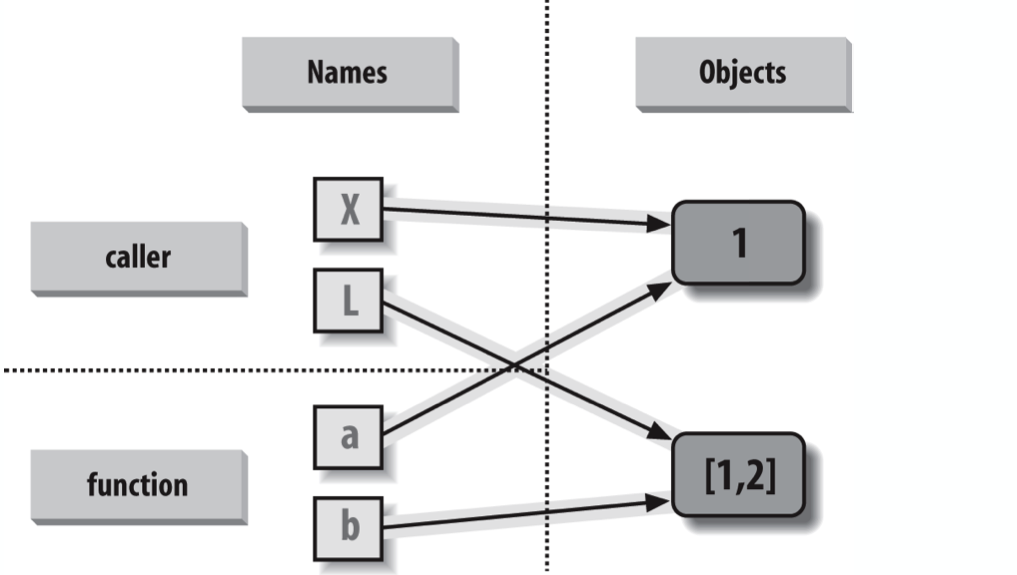



In [1]:
def c(a, b):
    a = 2
    b[0] = 'spam'
x = 1
l = [1,2]
c(x, l)
print(x,l)

# Argument b is a local variable name, too, but it is passed a mutable object (the list
# that L references in the caller’s scope). As the second assignment is an in-place object change, 
# the result of the assignment to b[0] in the function impacts the value of L after the function returns.


1 ['spam', 2]


### Avoiding Mutable Argument Changes 
Arguments are normally passed to functions by reference because that is what we nor- mally want. It means we can pass large objects around our programs without making multiple copies along the way, and we can easily update these objects as we go.

*Python’s class model depends upon changing a passed-in “self” argument in place, to update object state.*

> we can always copy the list at the point of call, with tools like `list`, `list.copy`, or a `l[:]` empty slice

### Simulating Output Parameters and Multiple Results 
return can **send back any sort of object**, it can *return multiple values by packaging them in a tuple or other collection type*. 

In fact, although *Python doesn’t support what some languages label **“call by reference” argument passing, we can usually simulate it by returning tuples and assigning the results back to the original argument** names in the caller*.

In [4]:
def r():
    return 1,2,34
r = r()
print(type(r))

<class 'tuple'>


After the call returns, we can use tuple assignment to unpack the parts of the returned tuple.

The net **effect of this coding pattern is to both send back multiple results and simulate the output parameters of other languages by explicit assignments**. 

## Special Argument-Matching Modes
Arguments are **always passed by assignment in Python; names in the def header are assigned to passed-in objects**.

By **default, arguments are matched by position, from left to right**, and you *must pass exactly as many arguments as there are argument names in the function header*.

### Argument Matching Basics
- Positionals: matched from left to right : match passed argu- ment values to argument names in a function header by position, from left to right. 

In [5]:
def f(a,b):
    pass
f(1,3)

- Keywords: matched by argument name : specify which argument in the function is to receive a value by using the argument’s name in the call, with the `name=value` syntax.
- Defaults: specify values for optional arguments that aren’t passed : specify default values for arguments to receive if the call passes too few values, with the `name=value` syntax.

In [8]:
def f(a,b = 10):
    pass
f(a = 1)

- Varargs collecting: collect arbitrarily many positional or keyword arguments : **special arguments preceded with one or two `*` characters to collect an arbitrary number of possibly extra arguments**.
- Varargs unpacking: pass arbitrarily many positional or keyword arguments : **callers can use the  * syntax to unpack argument collections into separate arguments**. *In the call it means unpack arbitrarily many arguments, and pass them individually as discrete values*.

- Keyword-only arguments: arguments that must be passed by name : specify arguments that must be passed by name with keyword arguments, not by position. Such arguments are typically used to define configuration options in addition to actual arguments.

### Argument Matching Syntax 

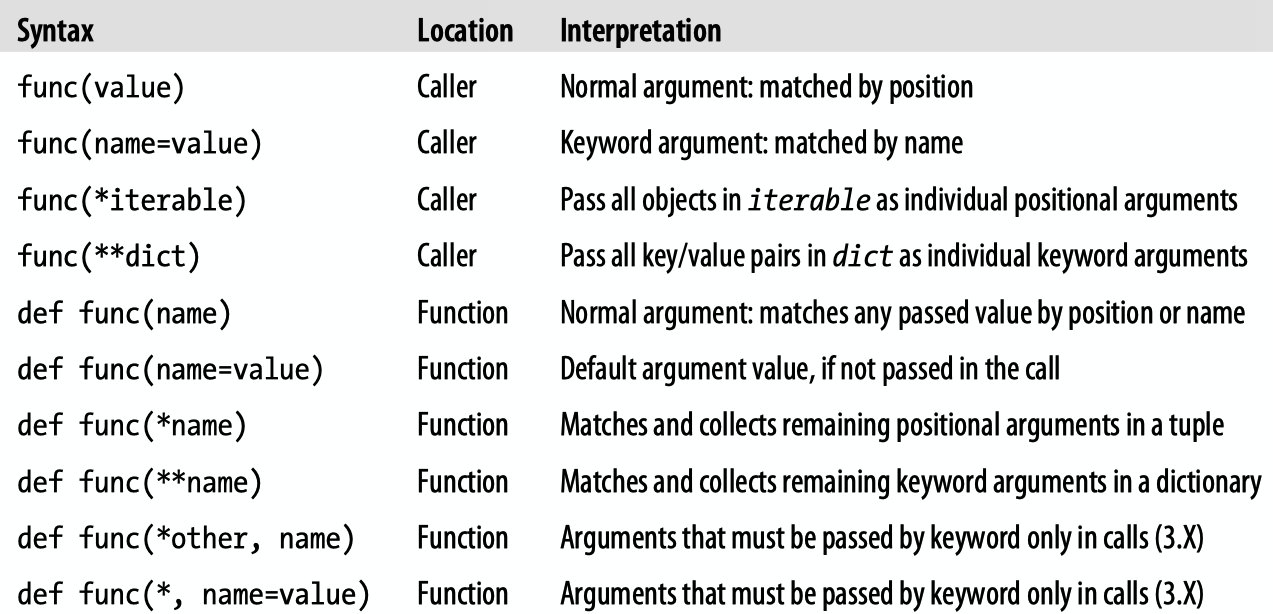



- In a *function call, simple values are matched by position, but using the `name=value` form tells Python to match by name to arguments instead; these are called keyword arguments*.
- In a *function header, a simple name is matched by position or name depending on how the caller passes it, but the `name=value` form specifies a default value. The `*name` form collects any extra unmatched positional arguments in a tuple, and the `**name` form collects extra keyword arguments in a dictionary*. 

> ny normal or defaulted argument **names following a `*name` or a `bare *` are keyword-only arguments and must be passed by keyword in calls**.

### The Gritty Details 

- In a function call, arguments must appear in this order: any positional arguments (value); followed by a combination of any keyword arguments (name=value) and the *iterable form; followed by the `**dict` form.
- In a function header, arguments must appear in this order: any normal arguments (name); followed by any default arguments (name=value); followed by the *name (or * in 3.X) form; followed by any name or name=value keyword-only arguments; followed by the `**name` form.

Steps that Python internally carries out to match arguments before assignment
1. Assign nonkeyword arguments by position.
2. Assign keyword arguments by matching names.
3. Assign extra nonkeyword arguments to *name tuple.
4. Assign extra keyword arguments to **name dictionary.
5. Assign default values to unassigned arguments in header.

Python then checks to make sure each argument is passed just one value; if not, an error is raised.

> not to confuse the special  name=value syntax in a function header and a function call; in the call it means a match-by-name keyword argument, while in the header it specifies a default for an optional argument. In both cases, this is not an assignment statement (despite its appearance); it is special syntax for these two con- texts, which modifies the default argument-matching mechanics.

> if you code a default to be a mutable object (e.g., def f(`a=[]`)), the same, single mutable object is reused every time the function is later called—even if it is changed in place within the function. The net effect is that the ar- gument’s default retains its value from the prior call, and is not reset to its original value coded in the def header. To reset anew on each call, move the assignment into the function body instead.

In [10]:
def f(a=[]):
    a.append(1)
    print(a)
f()
f()

[1]
[1, 1]


##### Headers: Collecting arguments 
collects unmatched positional arguments into a tuple.
Python collects all the positional arguments into a new tuple and assigns the variable `args` to that tuple.

** feature is similar, but it only works for keyword arguments—it collects them into a new dictionary, which can then be processed with normal dictionary tools. In a sense, the ** form allows you to convert from keywords to dictionaries, which you can then step through with keys calls, dictionary iterators.


In [13]:
def f(*args, **kargs):
    print(args,kargs)

f(1,2,4,4,k=1,m=2,j=3)

(1, 2, 4, 4) {'k': 1, 'm': 2, 'j': 3}


##### Calls: Unpacking arguments
can use the * syntax when we call a function, too. In this context, its meaning is the inverse of its meaning in the function definition—it unpacks a collection of arguments, rather than building a collection of arguments.

the ** syntax in a function call unpacks a dictionary of key/value pairs into separate keyword arguments.

> the built-in __name__ attribute attached to every function (as you might expect, it’s the function’s name string)


## Python 3.X Keyword-Only Arguments 
Python 3.X generalizes the ordering rules in function headers to allow us to specify keyword-only arguments—arguments that must be passed by keyword only and will never be filled in by a positional argument. This is useful if we want a function to both process any number of arguments and accept possibly optional configuration options. 

* keyword-only arguments are coded as named arguments that may appear after `*args` in the arguments list.*

use a `*` character by itself in the arguments list to indicate that a function does not accept a variable-length argument list but still expects *all arguments following the `*` to be passed as keywords*.

keyword-only arguments with defaults are optional, but those without defaults effectively become required keywords for the function

### Ordering rules 
keyword-only arguments must be specified after a single star, not two —named arguments cannot appear after the **args arbitrary keywords form, and a ** can’t appear by itself in the arguments list.

in function calls: when keyword-only arguments are passed, they must appear before a `**args` form. The keyword-only argument can be coded either before or after the *args, though.

### Why Keyword-only arguments
they make it easier to allow a function to accept both any number of positional arguments to be processed, and con- figuration options passed as keywords. While their use is optional, without keyword- only arguments extra work may be required to provide defaults for such options and to verify that no superfluous keywords were passed.


## The min Wakeup Call!

what we want to happen—because these functions support any data type, there is no valid sentinel value that we could pass back to designate an error, so we may as well let the exception be raised.

